In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import log_loss,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")
train_data.head(10)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No
5,10hours,Less than ₹12500,4~8,1,gt8,Divorced,Take-away restaurant,50plus,1,0,...,1,0,0,40,less1,22,Spring,Location C,0,Yes
6,2days,Less than ₹12500,less1,1,1~3,Single,Cold drinks,below21,0,0,...,0,0,0,89,never,7,Spring,Location C,0,Yes
7,2days,₹50000 - ₹62499,never,1,1~3,Married partner,Restaurant with pub,50plus,0,0,...,1,1,0,40,less1,10,Summer,Location B,0,No
8,10hours,₹12500 - ₹24999,less1,1,less1,Single,Restaurant with pub,41,1,0,...,1,1,1,89,never,7,Summer,Location C,0,No
9,10hours,₹75000 - ₹87499,4~8,1,1~3,Married partner,4 star restaurant,41,1,0,...,1,1,0,67,less1,22,Winter,Location B,0,Yes


In [4]:
train_data.shape

(12379, 31)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [6]:
train_data.describe()

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Travel Time,Prefer home food
count,12379.000000,12379.000000,12379.000000,12379.0,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000,12379.000000
mean,0.565393,0.506665,0.119396,1.0,0.213426,0.499556,0.502706,0.787382,0.415623,1.987802,71.139187,13.947896,0.509815
std,0.495725,0.499976,0.324267,0.0,0.409742,0.500020,0.500013,0.409176,0.492849,1.421653,19.215969,5.395232,0.499924
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,67.000000,10.000000,0.000000
50%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,67.000000,14.000000,1.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,89.000000,22.000000,1.000000


In [7]:
test_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/test_data.csv")
test_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1


In [8]:
test_data.shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      5305 non-null   object
 1   income_range                          5305 non-null   object
 2   no_visited_Cold drinks                5215 non-null   object
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64 
 4   Restaur_spend_less_than20             5244 non-null   object
 5   Marital Status                        5305 non-null   object
 6   restaurant type                       5305 non-null   object
 7   age                                   5305 non-null   object
 8   Prefer western over chinese           5305 non-null   int64 
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64 
 10  travelled_more_than_5mins_for_offer   5305 non-null   int64 
 11  no_visited_bars               

<AxesSubplot:>

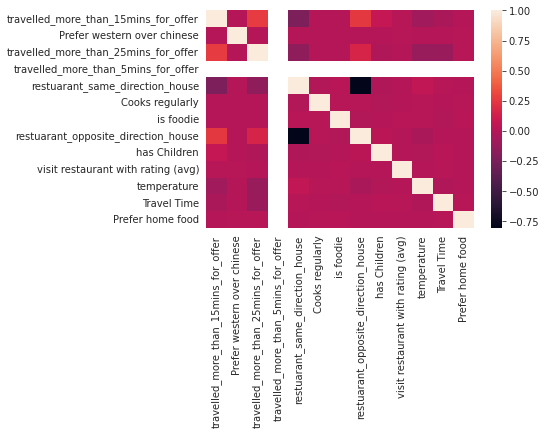

In [9]:
corr = train_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Data Cleaning and preprocessing

In [10]:
duplicate = train_data[train_data.duplicated(keep= "last")] #(74, 26)
train_data = train_data.drop_duplicates()
print("Shape of dataset after removing duplicates:",train_data.shape)

Shape of dataset after removing duplicates: (12379, 31)


In [11]:
df=train_data
df2=test_data
df=df.drop(["car","travelled_more_than_5mins_for_offer"], axis=1)
df2=df2.drop(["car","travelled_more_than_5mins_for_offer"], axis=1)
df=df.dropna() 
df.describe


<bound method NDFrame.describe of       offer expiration     income_range no_visited_Cold drinks  \
0                2days  ₹100000 or More                    4~8   
1                2days  ₹87500 - ₹99999                    4~8   
2                2days  ₹87500 - ₹99999                  less1   
3              10hours  ₹37500 - ₹49999                  less1   
4                2days  ₹100000 or More                  never   
...                ...              ...                    ...   
12374          10hours  ₹25000 - ₹37499                  less1   
12375            2days  ₹25000 - ₹37499                    4~8   
12376          10hours  ₹87500 - ₹99999                    4~8   
12377          10hours  ₹12500 - ₹24999                    4~8   
12378            2days  ₹37500 - ₹49999                    1~3   

       travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                         1                     less1   
1                          

<AxesSubplot:>

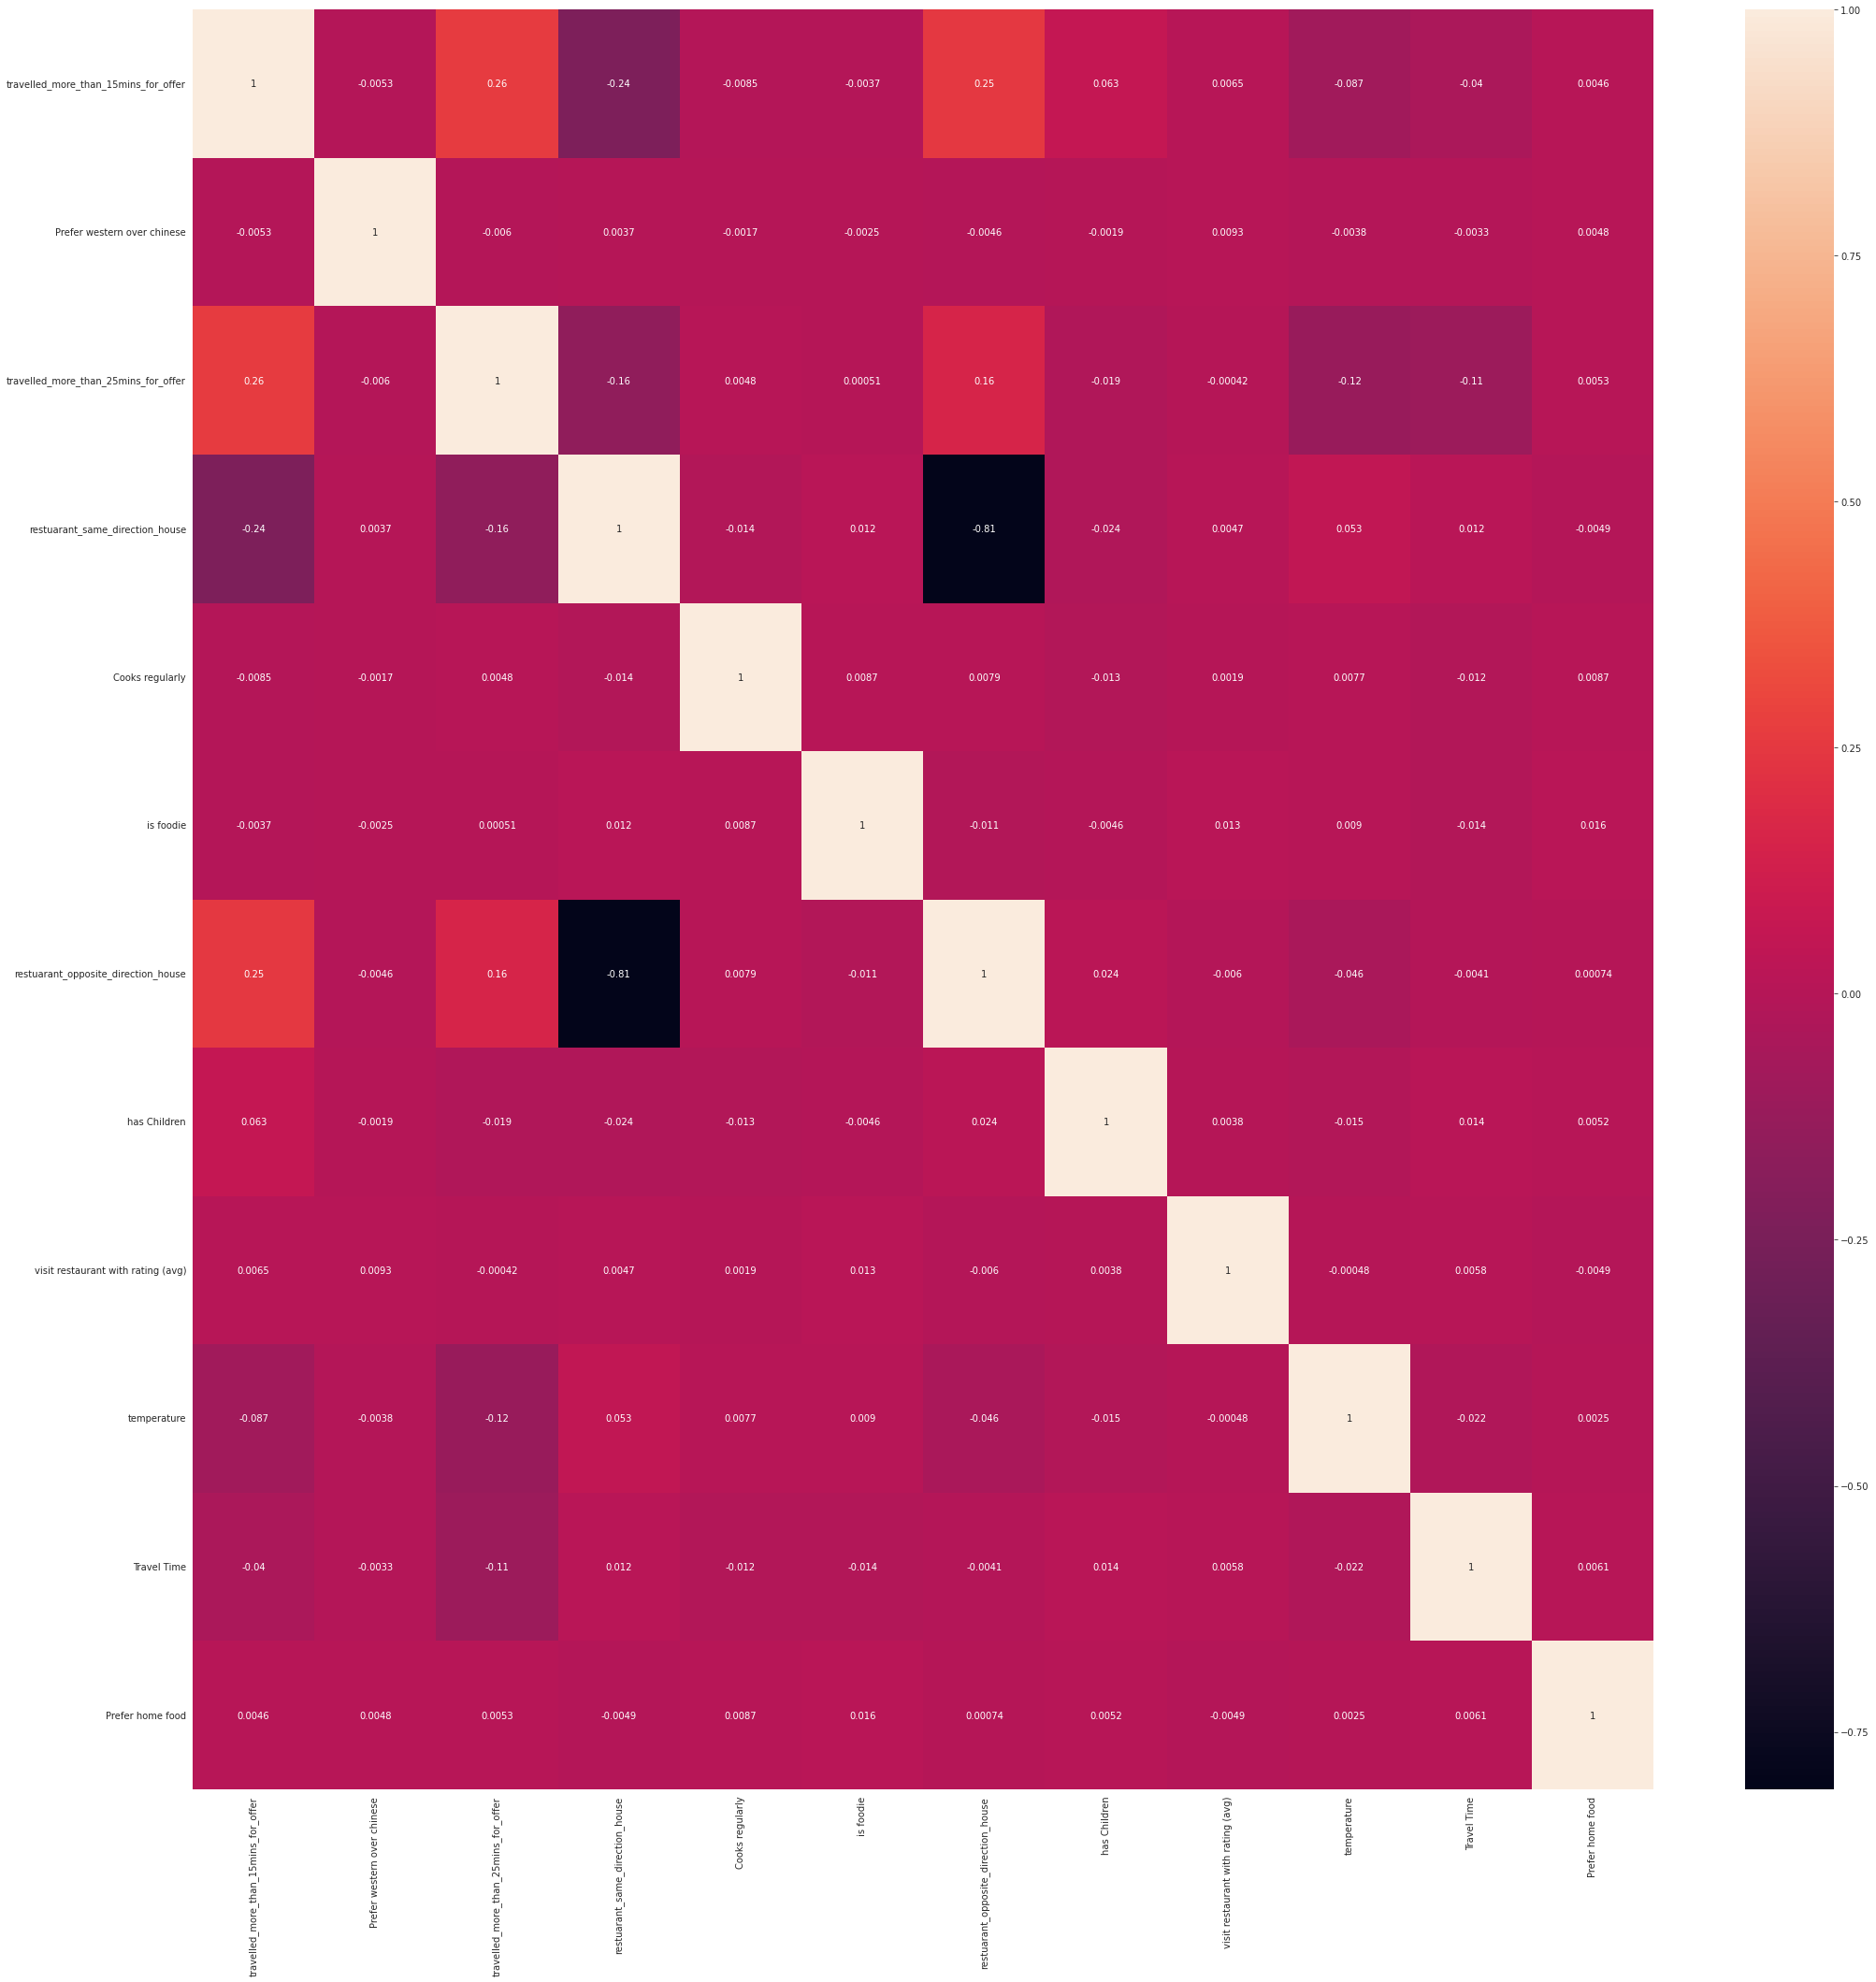

In [12]:
#Data Visualisation
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.corr(), annot = True, ax=ax)

In [13]:
df.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                             0
Restaur_spend_greater_than20      

In [14]:
df=df.drop(["restuarant_opposite_direction_house"], axis=1)
df2=df2.drop(["restuarant_opposite_direction_house"], axis=1)

In [15]:
df.nunique()

offer expiration                         2
income_range                             9
no_visited_Cold drinks                   5
travelled_more_than_15mins_for_offer     2
Restaur_spend_less_than20                5
Marital Status                           5
restaurant type                          5
age                                      8
Prefer western over chinese              2
travelled_more_than_25mins_for_offer     2
no_visited_bars                          5
gender                                   2
restuarant_same_direction_house          2
Cooks regularly                          2
Customer type                            4
Qualification                            6
is foodie                                2
no_Take-aways                            5
Job/Job Industry                        25
has Children                             2
visit restaurant with rating (avg)       5
temperature                              3
Restaur_spend_greater_than20             5
Travel Time

In [16]:
temp_X=pd.DataFrame(df.iloc[:,:-1])
temp_y=pd.DataFrame(df.iloc[:,-1])
print(temp_y)
print(temp_X)

      Offer Accepted
0                 No
1                Yes
2                Yes
3                 No
4                 No
...              ...
12374            Yes
12375            Yes
12376             No
12377            Yes
12378            Yes

[11802 rows x 1 columns]
      offer expiration     income_range no_visited_Cold drinks  \
0                2days  ₹100000 or More                    4~8   
1                2days  ₹87500 - ₹99999                    4~8   
2                2days  ₹87500 - ₹99999                  less1   
3              10hours  ₹37500 - ₹49999                  less1   
4                2days  ₹100000 or More                  never   
...                ...              ...                    ...   
12374          10hours  ₹25000 - ₹37499                  less1   
12375            2days  ₹25000 - ₹37499                    4~8   
12376          10hours  ₹87500 - ₹99999                    4~8   
12377          10hours  ₹12500 - ₹24999                    4~8

In [17]:
temp_y=pd.get_dummies(temp_y)
y=pd.DataFrame(temp_y.iloc[:,-1])
y

,Offer Accepted_Yes
0,0
1,1
2,1
3,0
4,0
...,...
12374,1
12375,1
12376,0
12377,1


In [18]:
X=pd.get_dummies(temp_X)
X

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,has Children,visit restaurant with rating (avg),temperature,Travel Time,...,Restaur_spend_greater_than20_4~8,Restaur_spend_greater_than20_gt8,Restaur_spend_greater_than20_less1,Restaur_spend_greater_than20_never,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C
0,1,0,0,0,1,0,0,4,67,22,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,0,1,3,89,18,...,0,0,0,0,0,1,0,0,1,0
2,1,1,0,1,0,1,1,4,67,7,...,0,0,1,0,0,0,1,1,0,0
3,0,1,0,1,0,1,1,3,89,7,...,0,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0,1,0,3,40,7,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,1,0,0,0,0,1,1,1,89,22,...,0,0,0,1,0,1,0,0,1,0
12375,0,0,0,0,0,1,1,2,67,18,...,0,0,0,1,0,1,0,0,1,0
12376,1,0,1,0,1,1,0,2,89,18,...,0,1,0,0,1,0,0,0,1,0
12377,1,0,0,0,1,0,0,1,89,7,...,0,0,1,0,0,1,0,0,0,1


In [19]:
temp_X2=pd.DataFrame(df2.iloc[:,:])
print(temp_X2)

     offer expiration     income_range no_visited_Cold drinks  \
0               2days  ₹37500 - ₹49999                    1~3   
1             10hours  ₹25000 - ₹37499                    4~8   
2               2days  ₹100000 or More                  never   
3               2days  ₹25000 - ₹37499                  never   
4             10hours  ₹12500 - ₹24999                  never   
...               ...              ...                    ...   
5300            2days  ₹25000 - ₹37499                  less1   
5301          10hours  ₹62500 - ₹74999                    1~3   
5302          10hours  ₹50000 - ₹62499                    gt8   
5303            2days  ₹50000 - ₹62499                    1~3   
5304            2days  ₹37500 - ₹49999                  less1   

      travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                        1                       1~3   
1                                        0                       1~3   
2  

In [20]:
X2=pd.get_dummies(temp_X2)
X2

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,has Children,visit restaurant with rating (avg),temperature,Travel Time,...,Restaur_spend_greater_than20_4~8,Restaur_spend_greater_than20_gt8,Restaur_spend_greater_than20_less1,Restaur_spend_greater_than20_never,Climate_Spring,Climate_Summer,Climate_Winter,drop location_Location A,drop location_Location B,drop location_Location C
0,1,0,1,0,0,0,1,4,89,7,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,1,0,67,18,...,0,0,1,0,0,1,0,1,0,0
2,1,1,0,0,1,0,0,4,67,7,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,1,1,0,40,18,...,0,0,1,0,1,0,0,0,0,1
4,0,1,0,1,0,1,0,0,89,18,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,0,0,0,1,0,0,0,1,67,18,...,0,0,0,0,0,1,0,0,1,0
5301,0,0,0,1,1,1,0,3,89,18,...,0,0,0,0,0,1,0,0,1,0
5302,1,0,0,0,1,1,1,2,67,7,...,0,0,0,0,0,1,0,0,0,1
5303,1,1,0,0,1,0,1,3,89,7,...,0,0,0,0,0,1,0,1,0,0


Logistic Regression

In [21]:
# params = {
#     'penalty': ['l1'],
#     'C': [0.08,.11]
# }

# # Building model
# logreg = LogisticRegression(solver='saga')

# # Parameter estimating using GridSearch
# grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# # Fitting the model
# grid.fit(X, y)

# print('Best Score:', grid.best_score_)
# print('Best Params:', grid.best_params_)
# print('Best Estimator:', grid.best_estimator_)

<hi>SVM</h1>

In [22]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)

In [23]:
# y_pred = clf.predict(X2)

In [24]:
# finaldf=pd.DataFrame(y_pred.reshape(-1,1))
# finaldf = finaldf.replace(to_replace=0,
#            value="No")
# finaldf = finaldf.replace(to_replace=1,
#            value="Yes")

In [25]:
# finaldf.reset_index(inplace=True)
# finaldf.columns=['id','Offer Accepted']

In [26]:
#finaldf.to_csv('submission.csv',index=False)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:

# Building model
rfc = RandomForestClassifier(n_estimators=550,max_features=50,
max_depth=150,random_state=30,min_samples_split=15)


# Fitting the model
rfc.fit(X,y)

RandomForestClassifier(max_depth=150, max_features=50, min_samples_split=15,
                       n_estimators=550, random_state=30)

In [30]:
# y_pred = rfc.predict(X_test)
# accuracy_score(y_test, y_pred)

In [31]:
# # Calculating metrics
# from sklearn.metrics import classification_report
# rfc_grid_score = accuracy_score(y_test, y_pred)
# print('Model Accuracy:', rfc_grid_score)
# print('Classification Report:\n', classification_report(y_test, y_pred))

In [32]:

# y_pred = rfc.predict(X2)


Decision tree


In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier( max_depth=150,criterion="entropy",random_state=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, max_features=50, min_samples_split=15,
                       n_estimators=550, random_state=30)

In [34]:
# y_pred = rfc.predict(X_test)
# t=accuracy_score(y_test, y_pred)
# t

Gradient boosting

In [35]:
from xgboost import XGBClassifier



# Building model
xgb = XGBClassifier(objective="binary:logistic",n_estimators=600, max_depth=20, random_state=30)


xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=30,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:

 y_pred = rfc.predict(X2)
#accuracy_score(y_test, y_pred)


In [37]:
finaldf=pd.DataFrame(y_pred.reshape(-1,1))
finaldf = finaldf.replace(to_replace=0,
           value="No")
finaldf = finaldf.replace(to_replace=1,
           value="Yes")

finaldf.reset_index(inplace=True)
finaldf.columns=['id','Offer Accepted']



In [38]:
finaldf.to_csv('submission.csv',index=False)